In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests
import os

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
lats = np.random.uniform(-90.000, 90.000, 1500)
lngs = np.random.uniform(-180.000, 180.000, 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
cities = []

# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)



len(cities)

604

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
from xml.etree.ElementTree import tostring


city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | rikitea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | busselton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | ketchikan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | ambilobe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | ponta do sol
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | faanui
-----------------------------
Data Retrieval Complete      
---------------------

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.49,78,96,17.07,PF,2022-08-09 19:25:38
1,Busselton,-33.6500,115.3333,50.59,69,89,11.32,AU,2022-08-09 19:25:38
2,Ketchikan,55.3422,-131.6461,66.67,52,0,11.50,US,2022-08-09 19:21:01
3,Ambilobe,-13.2000,49.0500,69.22,71,4,4.85,MG,2022-08-09 19:25:38
4,Ponta Do Sol,32.6667,-17.1000,74.03,80,18,5.41,PT,2022-08-09 19:25:39
...,...,...,...,...,...,...,...,...,...
551,Oron,4.8256,8.2343,74.80,94,87,4.52,NG,2022-08-09 19:39:39
552,Tawang,27.5833,91.8667,57.99,93,100,1.19,IN,2022-08-09 19:39:40
553,Batagay,67.6333,134.6333,55.11,84,0,2.89,RU,2022-08-09 19:40:40
554,Ajdabiya,30.7554,20.2263,80.80,74,0,11.63,LY,2022-08-09 19:40:40


In [15]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-08-09 19:25:38,-23.1203,-134.9692,73.49,78,96,17.07
1,Busselton,AU,2022-08-09 19:25:38,-33.6500,115.3333,50.59,69,89,11.32
2,Ketchikan,US,2022-08-09 19:21:01,55.3422,-131.6461,66.67,52,0,11.50
3,Ambilobe,MG,2022-08-09 19:25:38,-13.2000,49.0500,69.22,71,4,4.85
4,Ponta Do Sol,PT,2022-08-09 19:25:39,32.6667,-17.1000,74.03,80,18,5.41
...,...,...,...,...,...,...,...,...,...
551,Oron,NG,2022-08-09 19:39:39,4.8256,8.2343,74.80,94,87,4.52
552,Tawang,IN,2022-08-09 19:39:40,27.5833,91.8667,57.99,93,100,1.19
553,Batagay,RU,2022-08-09 19:40:40,67.6333,134.6333,55.11,84,0,2.89
554,Ajdabiya,LY,2022-08-09 19:40:40,30.7554,20.2263,80.80,74,0,11.63


In [17]:
city_data_df.to_csv(os.path.join("weather_data", "cities.csv"), index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

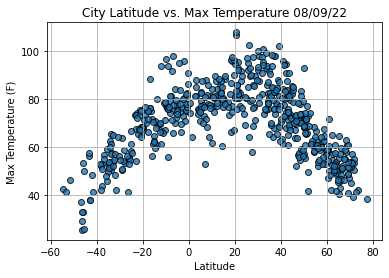

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

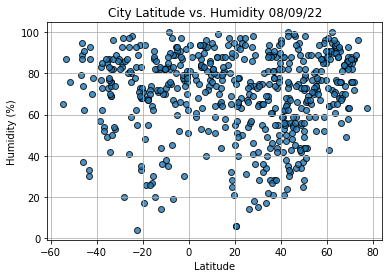

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

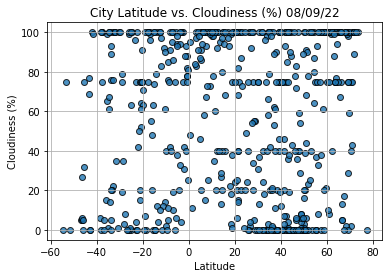

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

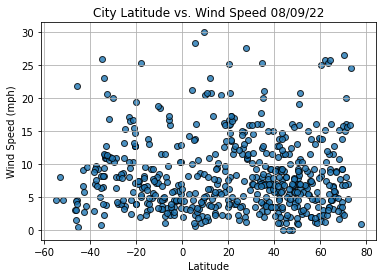

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()